In [12]:
import sys
sys.path.insert(0, '../../')
sys.path.insert(0, '../../pyathena/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import tigradpy as tp
import pyathena as pa

print(tp.__all__)

['add_fields', 'mass_to_lum', 'read_athinput', 'read_hst', 'read_zprof', 'read_zprof_all', 'yt_multipanel']


In [13]:
print(tp.mass_to_lum.__init__.__doc__)


        Initialize a mass_to_lum object.

        Parameters
        ----------
        model: string
           Name of population synthesis model or stellar evolutionary track.
           'SB99': Starburst99 (IMF mean). This option should be used for 
                   coeval populations of stars that well-samples the IMF.
           'Padova': Power-law approximation for stellar properties
                     using Padova track (Bruzual & Charlot 2003).
                     Data from Table 1 in Parravano et al. (2003).
                     This option should be used for individual stars.
        


__IMF averaged mass-to-luminosity conversion factors__

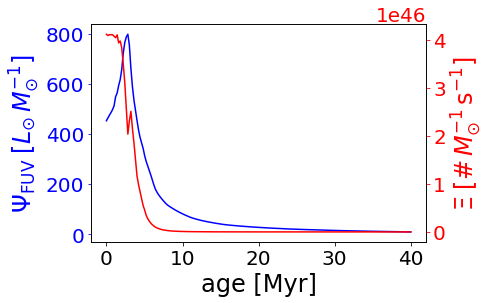

In [14]:
MtoL = tp.mass_to_lum(model='SB99')
age = np.linspace(0, 40.0, 200)
plt.rc('font', size=20)
with plt.rc_context({'ytick.color':'b', 'axes.labelcolor':'b'}):
    plt.plot(age, MtoL.calc_LFUV(1.0, age), 'b-')
    plt.xlabel('age [Myr]', color='k')
    plt.ylabel(r'$\Psi_{\rm FUV}\;[L_{\odot}\,M_{\odot}^{-1}]$')
    #plt.yscale('log')

with plt.rc_context({'ytick.color':'r', 'axes.labelcolor':'r'}):
    axt = plt.gca().twinx()
    axt.plot(age, MtoL.calc_Qi(1.0, age), 'r-')
    plt.ylabel(r'$\Xi\;[{\rm \#}\,M_{\odot}^{-1}\,{\rm s}^{-1}]$')
    #plt.yscale('log')

__Max main-sequence age, mean luminosity (for individual stars)__

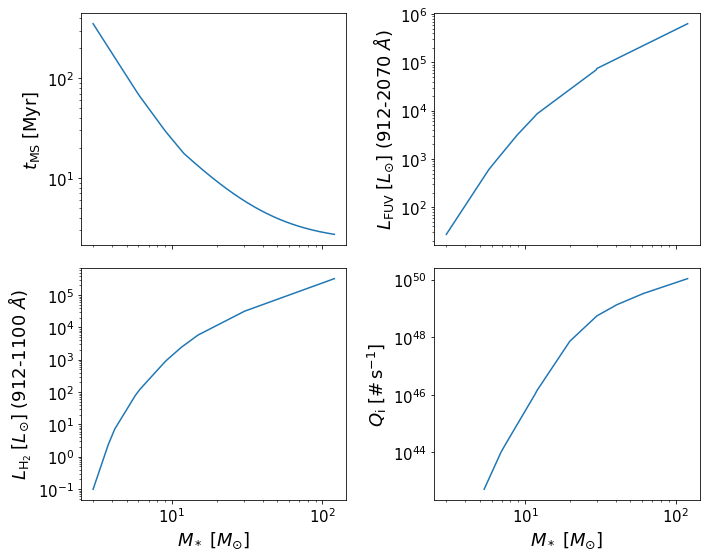

In [10]:
MtoL = tp.mass_to_lum(model='Padova')
mass = np.linspace(3.0, 120.0, 300)

mpl.rcParams['font.size'] = 15.0
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
axes = axes.flatten()
plt.sca(axes[0])
plt.loglog(mass, MtoL.agemax_MS(mass))
plt.ylabel(r'$t_{\rm MS}\;[{\rm Myr}]$')
plt.sca(axes[1])
plt.loglog(mass, MtoL.LFUV(mass))
plt.ylabel(r'$L_{\rm FUV}\;[L_{\odot}]$ (912-2070 $\AA$)')
plt.sca(axes[2])
plt.loglog(mass, MtoL.LH2(mass))
plt.xlabel(r'$M_*\;[M_{\odot}]$')
plt.ylabel(r'$L_{{\rm{H}_2}}\;[L_{\odot}]$ (912-1100 $\AA$)')
plt.sca(axes[3])
plt.loglog(mass, MtoL.Qi(mass))
plt.xlabel(r'$M_*\;[M_{\odot}]$')
plt.ylabel(r'$Q_{\rm i}\;[\#\,{\rm s}^{-1}]$')
plt.tight_layout()

In [4]:
mpl.matplotlib_fname()

'/home/jk11/.config/matplotlib/matplotlibrc'